In [28]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [31]:
# atributing dataset to a dataframe df
df= pd.read_csv('Kaggle/FuelConsumptionCo2.csv')
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [39]:
# describing statiscal measures
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [40]:
df.shape


(1067, 13)

<AxesSubplot:>

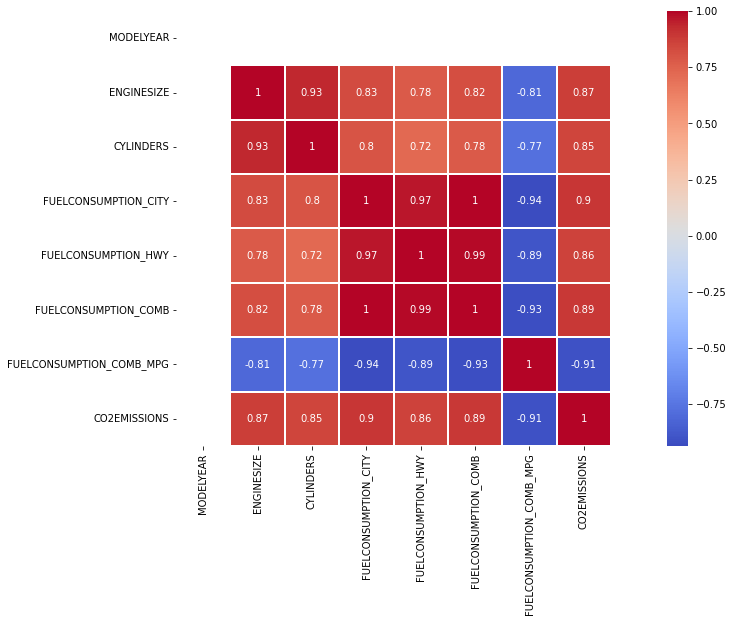

In [41]:
# plotting correlation matrix
plt.figure(figsize=(20,8))
sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True)

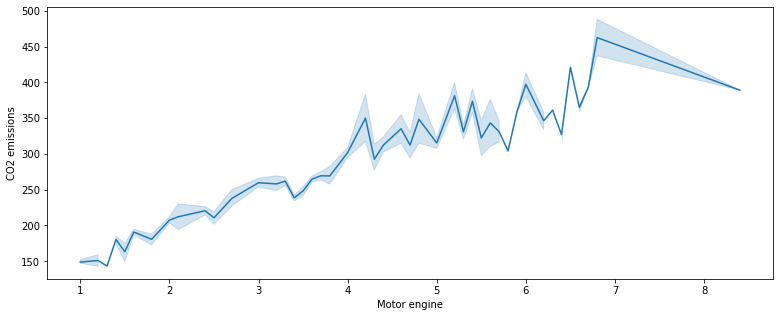

In [42]:
# ploting graph engine size x CO2 emissions
plt.figure(figsize=(13,5))
sns.lineplot(x=df['ENGINESIZE'], y=df['CO2EMISSIONS'])
plt.xlabel('Motor engine')
plt.ylabel('CO2 emissions')
plt.show()

In [43]:
# importing necessary libraries
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [44]:
# features into variables
engine= df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]

In [45]:
# spliting data in train and test with train_test_split
engine_treino, engine_test, co2_treino, co2_test = train_test_split(engine, co2, test_size=0.2, random_state=42)

In [46]:
print(type(engine_treino))

<class 'pandas.core.frame.DataFrame'>


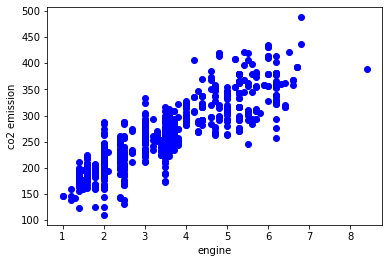

In [47]:
# ploting the correlation between features
plt.scatter(engine_treino, co2_treino, color='blue')
plt.xlabel('engine')
plt.ylabel('co2 emission')
plt.show()

In [48]:
# creating a linear regression model
# LinearRegression is a method of sklearn
modelo = linear_model.LinearRegression()

In [49]:
# linear regression formula: (Y = A + B.X)
# training the model to obtain the values of A and B (always do it in the train dataset)
modelo.fit(engine_treino, co2_treino)

LinearRegression()

In [50]:
# exibiting the coeficients A and B that the model generated
print(f'(A) intercept: {modelo.intercept_} | (B) inclination: {modelo.coef_}')

(A) intercept: [126.28970217] | (B) inclination: [[38.99297872]]


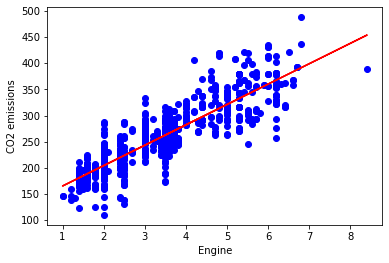

In [51]:
# print linear regression line on our TRAIN dataset
plt.scatter(engine_treino, co2_treino, color='blue')
plt.plot(engine_treino, modelo.coef_[0][0]*engine_treino + modelo.intercept_[0], '-r') 
# LR formula: inclination(B) * engine_treino(X) + intercept(A)
plt.ylabel('CO2 emissions')
plt.xlabel('Engine')
plt.show()

In [52]:
predictCO2 = modelo.predict(engine_test)

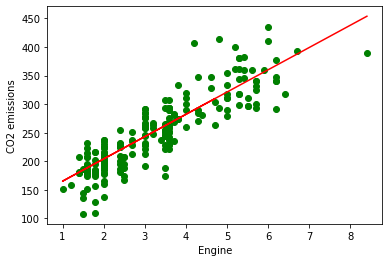

In [53]:
# print linear regression line on our TEST dataset
plt.scatter(engine_test, co2_test, color='green')
plt.plot(engine_test, modelo.coef_[0][0]*engine_test + modelo.intercept_[0], '-r')
plt.ylabel('CO2 emissions')
plt.xlabel('Engine')
plt.show()

In [54]:
# Showing metrics to check the acuracy of our model
print(f'Sum of squared error (SSE): {np.sum((predictCO2 - co2_test)**2)}') # SSE: sum all of the  residuals and square them. 
print(f'Mean squared error (MSE): {mean_squared_error(co2_test, predictCO2)}') # MSE: avg of SSE
print(f'Mean absolute error (MAE): {mean_absolute_error(co2_test, predictCO2)}')
print (f'Sqrt of mean squared error (RMSE):  {sqrt(mean_squared_error(co2_test, predictCO2))}') # RMSE: sqrt of the MSE
print(f'R2-score: {r2_score(predictCO2, co2_test)}') # r2-score: explains the variance of the variable Y when it comes to X

Sum of squared error (SSE): CO2EMISSIONS    210990.768215
dtype: float64
Mean squared error (MSE): 985.9381692274995
Mean absolute error (MAE): 24.097257411707837
Sqrt of mean squared error (RMSE):  31.399652374309806
R2-score: 0.6782015355440529
